# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html><html lang="id-ID"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="o'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
print(table.prettify()[1:500])

div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg">
 <div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">
  <style data-emotion="css 1b4vug6">
   .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}
  </style>
  <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itempr


In [5]:
table.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})[:1]

[<div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem"><a class="k-bg-white k-flex k-items-center k-flex-shrink k-justify-center k-text-4xl k-text-subdued k-overflow-hidden k-px-4 k-py-2 k-row-span-4" href="/id-ID/c/pt-akhdani-reka-solusi/jobs"><div><img alt="PT Akhdani Reka Solusi" class="k-block k-max-w-full k-max-h-full k-bg-white k-mx-auto" decoding="async" height="80" loading="eager" src="https://rec-data.kalibrr.com/www.kalibrr.com/logos/GB3TXCRC73LYTNEQPNGP8NA7WRX3J78NN9QLR8MW-60114666.png" width="130"/></div></a><div class="k-col-start-3 k-row-start-1"><h2 class="k-text-xl k-font-medium"><a class="k-text-primary-color" href="/id-ID/c/pt-akhdani-reka-solusi/jobs/208406/it-business-analyst-jakarta" itemprop="name">IT Business Analyst (Jakarta)</a></h2></div><style data-emotion="css 1gzvnis">.css-1gzvnis{display:-webkit-box!important;-webkit-line-clamp:2;-webkit-box-orien

Finding row length.

In [6]:
row = table.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})
row_length = len(row)
row_length

15

In [7]:
table

<div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg"><div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList"><style data-emotion="css 1b4vug6">.css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}</style><div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem"><a class="k-bg-white k-flex k-items-center k-flex-shrink k-justify-center k-text-4xl k-text-subdued k-overflow-hidden k-px-4 k-py-2 k-row-span-4" href="/id-ID/c/pt-akhdani-reka-solusi/jobs"><div><img alt="PT Akhdani Reka Solusi" class="k-block k-max-w-full k-max-h-full k-bg-white k-mx-auto" decoding="async" height="80" loading="eager" src="https://rec-data.kalibrr.com/www.kalibrr.com/logos/GB3TXCRC73LYTNEQPNGP8NA7WRX3J78NN9QLR8MW-60114666.

Do the scrapping process here (please change this markdown with your explanation)

In [8]:
# Initialize an empty list to store job data
temp = []

# Base URL for the job listings
base_url = 'https://www.kalibrr.id/id-ID/job-board/te/data/'

# Loop through a range of page numbers
for page_number in range(1, 15):
    # Create the full URL for the current page
    page_url = base_url + str(page_number) + '/'
    
    # Send an HTTP GET request to the page
    response = requests.get(page_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Find the job listings table
        table = soup.find('div', attrs={'class': 'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
        
        # Check if the table was found
        if table:
            # Find the length of the elements you want to scrape
            elements_length = len(table.find_all('div', attrs={'class': 'k-col-start-3 k-row-start-1'}))
            
            # Loop through the elements and scrape data
            for i in range(elements_length):
                title = table.find_all('div', attrs={'class': 'k-col-start-3 k-row-start-1'})[i].text
                
                lokasi = table.find_all('a', attrs={'class': 'k-text-subdued k-block'})[i].text.strip()
                
                data_pekerjaan = table.find_all('span', attrs={'class': 'k-block k-mb-1'})[i].text.split('•')
                tanggal_post = data_pekerjaan[0].strip()
                tanggal_deadline = data_pekerjaan[1].strip()
                
                perusahaan = table.find_all('span', attrs={'class': 'k-inline-flex k-items-center k-mb-1'})[i].text
                
                # Append the scraped data as a tuple to the temp list
                temp.append((title, lokasi, tanggal_post, tanggal_deadline, perusahaan))
print(temp)

[('Data Analyst', 'East Jakarta, Indonesia', 'Posted a month ago', 'Apply before 29 Oct', 'PT Berlian Sistem Informasi'), ('Product Operation Specialist (Mandarin Speaker)', 'Jakarta Selatan, Indonesia', 'Posted 14 days ago', 'Apply before 13 Oct', 'AdaPundi'), ('IT Data Center  Monitoring', 'Jakarta, Indonesia', 'Posted 16 days ago', 'Apply before 29 Oct', 'PGI Data'), ('Full Stack Developer (ReactJS & Golang)', 'Jakarta, Indonesia', 'Posted 7 days ago', 'Apply before 19 Sep', 'PGI Data'), ('IT Financial Control', 'Jakarta, Indonesia', 'Posted 2 days ago', 'Apply before 17 Jul', 'Code.id'), ('Data Engineer', 'Jakarta Selatan, Indonesia', 'Posted 13 days ago', 'Apply before 30 Oct', 'Magna Solusi Indonesia'), ('Data Engineer', 'Jakarta Selatan, Indonesia', 'Posted 19 days ago', 'Apply before 16 Oct', 'Quantyc.ai'), ('Digital Marketing Specialist', 'Tangerang Kota, Indonesia', 'Posted 12 days ago', 'Apply before 30 Sep', 'PT Alam Sutera Realty Tbk'), ('Data Engineering & Insight Lead (H

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Title','Lokasi','Tanggal Post', 'Tanggal Deadline','Perusahaan'))
df.tail()

,Title,Lokasi,Tanggal Post,Tanggal Deadline,Perusahaan
205,System Engineer - Corporate IT & IS,"West Jakarta, Indonesia",Posted 3 months ago,Apply before 29 Sep,Kompas Gramedia
206,Customer Success Manager,"Central Jakarta, Indonesia",Posted a month ago,Apply before 29 Sep,FinAccel
207,Network Engineer,"Kota Jakarta Pusat, Indonesia",Posted a month ago,Apply before 7 Aug,PT Astra Graphia Information Technology
208,Credit Analyst,"Jakarta, Indonesia",Posted 3 months ago,Apply before 26 Sep,Investree
209,Product Innovation Supervisor (Cikupa),"Tangerang, Indonesia",Posted 15 days ago,Apply before 20 Oct,Great Giant Foods


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

#### Perubahan Astype

In [10]:
df.dtypes

Title               object
Lokasi              object
Tanggal Post        object
Tanggal Deadline    object
Perusahaan          object
dtype: object

In [11]:
#Tanggal (Penghilangan 'Posted - days ago')
df['Tanggal Post'] = df['Tanggal Post'].str.replace('Posted','')
#Tanggal (Penghilangan 'Apply before-')
df['Tanggal Deadline'] = df['Tanggal Deadline'].str.replace('Apply before','')
# Lokasi (astype menjadi category)
df['Lokasi'] = df['Lokasi'].astype('category')
# Lokasi (astype menjadi category)
df['Lokasi'] = df['Lokasi'].str.replace(', Indonesia','')

In [12]:
# Checking unique category of Lokasi
df['Lokasi'].unique()

array(['East Jakarta', 'Jakarta Selatan', 'Jakarta', 'Tangerang Kota',
       'Central Jakarta City', 'West Jakarta', 'Kota Tangerang Selatan',
       'Yogyakarta', 'South Jakarta', 'Surabaya', 'Tangerang',
       'Kota Jakarta Selatan', 'Central Jakarta', 'Jakarta Pusat',
       'Tangerang Selatan', 'North Jakarta', 'Kota Jakarta Barat',
       'South Tangerang', 'Jakarta Timur', 'Jakarta Utara',
       'Jakarta Barat', 'Denpasar', 'Sumbawa', 'Kota Jakarta Pusat',
       'Mataram', 'Bandung Kota', 'Depok', 'Sleman', 'Badung',
       'Banyuwangi'], dtype=object)

In [30]:
#Renaming Jakarta jobs
jakarta_mapping = {
    'East Jakarta': 'Jakarta',
    'Jakarta Selatan': 'Jakarta',
    'Central Jakarta City': 'Jakarta',
    'West Jakarta': 'Jakarta',
    'Kota Tangerang Selatan': 'Jakarta',
    'South Jakarta': 'Jakarta',
    'Central Jakarta': 'Jakarta',
    'Jakarta Pusat': 'Jakarta',
    'North Jakarta': 'Jakarta',
    'Kota Jakarta Barat': 'Jakarta',
    'Jakarta Timur': 'Jakarta',
    'Jakarta Utara': 'Jakarta',
    'Jakarta Barat': 'Jakarta',
    'Kota Jakarta Pusat': 'Jakarta',
    'Kota Jakarta Selatan': 'Jakarta'
}
df['Lokasi'] = df['Lokasi'].replace(jakarta_mapping)

#Renaming Tangerang jobs
tangerang_mapping = {
    'Tangerang Kota': 'Tangerang'
}
df['Lokasi'] = df['Lokasi'].replace(tangerang_mapping)

#Renaming Tangerang Selatan
tangerangselatan_mapping = {
    'South Tangerang': 'Tangerang Selatan'
}
df['Lokasi'] = df['Lokasi'].replace(tangerangselatan_mapping)

#Renaming Bandung
bandung_mapping = {
    'Bandung Kota': 'Bandung'
}
df['Lokasi'] = df['Lokasi'].replace(bandung_mapping)

In [31]:
df['Lokasi'].unique()

array(['Jakarta', 'Tangerang', 'Yogyakarta', 'Surabaya',
       'Tangerang Selatan', 'Denpasar', 'Sumbawa', 'Mataram', 'Bandung',
       'Depok', 'Sleman', 'Badung', 'Banyuwangi'], dtype=object)

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

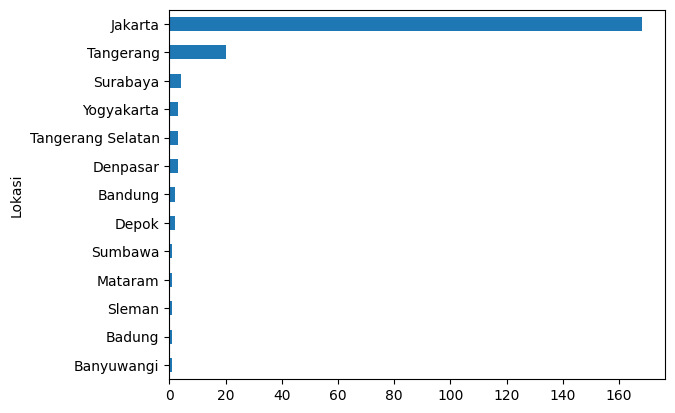

In [34]:
df['Lokasi'].value_counts().plot(kind = 'barh').invert_yaxis() 

Dari data yang dicantumkan, ditemukan bahwa Jakarta memiliki jumlah pekerjaan yang terbesar hingga melebihi 160. Lalu diikuti oleh Tangerang pada posisi ke-2 dan Surabaya pada posisi ke-3.